### #_Salary Prediction using Ensemble Learning_#

### 1. Import Libraries & Modules
- `pandas` for data handling.
- `matplotlib.pyplot` & `seaborn` for visualization.
- `sklearn.preprocessing` for feature scaling and encoding.
- `sklearn.model_selection` for train-test splitting.
- `sklearn.ensemble` for model training.
- `sklearn.metrics` for performance evaluation.

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

### 2. Data Collection
- We use the `salary_data` dataset.
- Convert it into a DataFrame.
- Check the entries and parameters.
- Display the first five rows to inspect raw data.

In [119]:
data = pd.read_csv('salary_data.csv')

print("No. of Data Entries:",data.shape[0])
print("No. of Parameters:",data.shape[1])
print()
print(data.info())
print()
print(data.head())

No. of Data Entries: 6704
No. of Parameters: 6

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB
None

    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    

### 3. Handling Null Values
- Check null values in columns.
- Remove rows with null values.

In [120]:
print(data.isnull().sum())
data.dropna(inplace=True)
print(data.isnull().sum())

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


### 4. Feature Correlation Analysis (Heat Map)
- A heatmap shows how strongly each feature is correlated with the target.
- Helps in selecting important features.

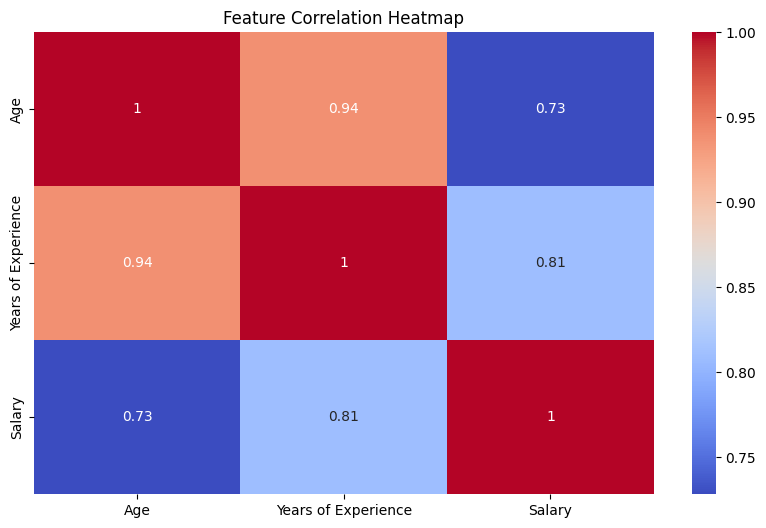

In [121]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

### 5. Encoding Data
- Converting the textual data to numeric data.
- Models works better with numeric data.

In [122]:
le_gender = LabelEncoder()
le_job = LabelEncoder()
le_edu = LabelEncoder()

data['Gender'] = le_gender.fit_transform(data['Gender'])
data['Job Title'] = le_job.fit_transform(data['Job Title'])
data['Education Level'] = le_edu.fit_transform(data['Education Level'])
    
print(data.info())
print()
print(data.head())

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   int32  
 2   Education Level      6698 non-null   int32  
 3   Job Title            6698 non-null   int32  
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
dtypes: float64(3), int32(3)
memory usage: 287.8 KB
None

    Age  Gender  Education Level  Job Title  Years of Experience    Salary
0  32.0       1                0        175                  5.0   90000.0
1  28.0       0                2         18                  3.0   65000.0
2  45.0       1                3        144                 15.0  150000.0
3  36.0       0                0        115                  7.0   60000.0
4  52.0       1                2         25                 20.0  

### 6. Generating HeatMap with all features

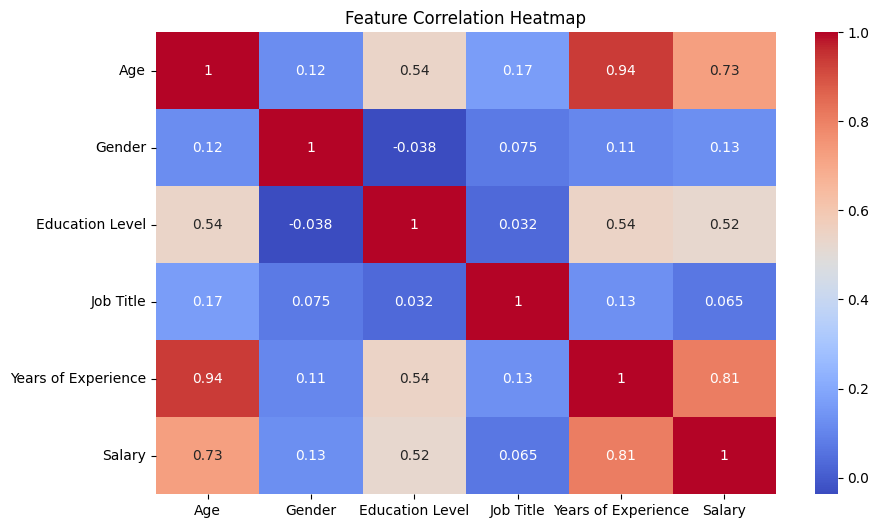

In [123]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm" )
plt.title("Feature Correlation Heatmap")
plt.show()

### 7. Data Preprocessing (Feature Normalization)
- `StandardScaler()` ensures features have zero mean and variance.
- Prevents features with large values from dominating the model.

In [124]:
scaler = StandardScaler()
features_to_scale = ['Years of Experience', 'Age']
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])
print(data.head())

        Age  Gender  Education Level  Job Title  Years of Experience    Salary
0 -0.213129       1                0        175            -0.510769   90000.0
1 -0.738393       0                2         18            -0.840811   65000.0
2  1.493980       1                3        144             1.139440  150000.0
3  0.312135       0                0        115            -0.180727   60000.0
4  2.413192       1                2         25             1.964544  200000.0


### 8. Feature-Target split
- Salary -> Dependent Variable.
- Rest features -> Independent Variable.

In [125]:
x = data.drop('Salary', axis=1)
y = data['Salary']

### 9. Train-Test split
- 80% training, 20% testing.
- Ensures the model generalizes well to unseen data.

In [126]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

print("No. of data entries used for training:", x_train.shape[0])
print("No. of data entries used for testing:", x_test.shape[0])

No. of data entries used for training: 5358
No. of data entries used for testing: 1340


### 10. Checking Linearity
- We plot `Years of Experience` vs. `Salary` since experience strongly influences salary.
- The red line is the regression trendline.
- If points align closely with the red line, a linear relationship exists.
- If scattered randomly, a non-linear model may be better.

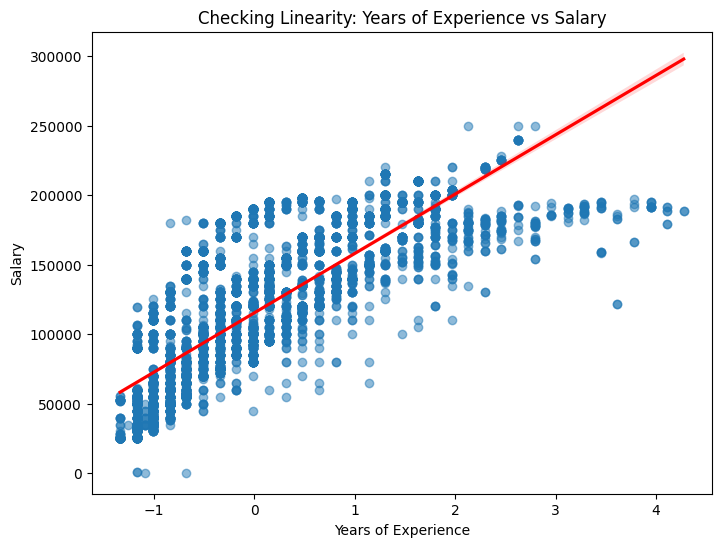

In [127]:
plt.figure(figsize=(8,6))
sns.regplot(x='Years of Experience', y='Salary', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Checking Linearity: Years of Experience vs Salary")
plt.show()

### 11. Model Training
- Random Forest Regressor.
- Gradient Boosting Regressor.
- Voting Regressor.

In [128]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(x_train, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [129]:
gb = GradientBoostingRegressor(n_estimators=200, random_state=42)
gb.fit(x_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,200
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [130]:
voting = VotingRegressor([('rf', rf), ('gb', gb)])
voting.fit(x_train, y_train)

,estimators,"[('rf', ...), ('gb', ...)]"
,weights,None
,n_jobs,None
,verbose,False
,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0


### 12. Model Evaluation and Selection
- `Mean Absolute Error (MAE)`: Measures average absolute errors.
- `R² Score`: Measures how well predictions match actual values.

In [131]:
models = {'Random Forest': rf, 'Gradient Boosting': gb, 'Voting Ensemble': voting}

for name, model in models.items():
    preds = model.predict(x_test)
    print(f"{name}: MAE={mean_absolute_error(y_test, preds):.2f}, R2={r2_score(y_test, preds):.2f}")

Random Forest: MAE=3796.22, R2=0.97
Gradient Boosting: MAE=9408.81, R2=0.94
Voting Ensemble: MAE=6348.10, R2=0.96


### Let's choose Random Forest Model

### 13. Model Prediction

In [132]:
y_pred = rf.predict(x_test)
df = pd.DataFrame({
    'Actual (y_test)':  y_test.values,
    'Predicted (y_pred)': y_pred
})
df['Error'] = df['Predicted (y_pred)'] - df['Actual (y_test)']
print(df.head(10))
print()
print("Mean Absolute Error:", df['Error'].abs().mean())


   Actual (y_test)  Predicted (y_pred)        Error
0         150000.0       149882.600000  -117.400000
1          75969.0        83326.195365  7357.195365
2         100000.0       100000.000000     0.000000
3          60000.0        61546.024332  1546.024332
4          80000.0        80000.000000     0.000000
5         190000.0       193783.140996  3783.140996
6          72000.0        72000.000000     0.000000
7          55000.0        55050.000000    50.000000
8         195000.0       197406.631224  2406.631224
9         130000.0       131890.744266  1890.744266

Mean Absolute Error: 3796.224383544375


### 14. Visual Inspection
- Plot predicted vs. actual salary values.
- Points should cluster along the diagonal if prediction is good.


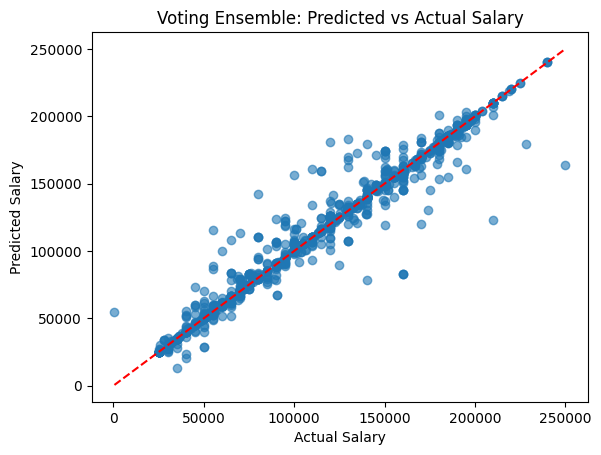

In [133]:
y_pred = rf.predict(x_test)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Voting Ensemble: Predicted vs Actual Salary")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.show()

### 15. Exproting Content
- Trained models.
- Scalers and Encoders.

In [134]:
import joblib

joblib.dump({
    'Random Forest': rf,
    'Gradient Boosting': gb,
    'Voting Ensemble': voting,
    'scaler': scaler,
    'le_gender': le_gender,
    'le_job': le_job,
    'le_edu': le_edu
}, 'model.pkl')


['model.pkl']